In [112]:
import numpy as np
import matplotlib.pyplot as plt

from mne import Epochs, pick_types, find_events
from mne.channels import read_layout, Montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
import mne

from sklearn.model_selection import  train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Import sample files

In [116]:


tmin, tmax = -1., 4.
event_id = dict(rest=1, activity=2)
subject = 1
runs = [1,4]

raw_fnames = eegbci.load_data(subject, runs)
raw_files = [read_raw_edf(f, preload=True, stim_channel='auto', verbose=False) for f in
             raw_fnames]
raw = concatenate_raws(raw_files)

raw.rename_channels(lambda x: x.strip('.'))

raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge', verbose=False)

events = find_events(raw, shortest_event=0, stim_channel='STI 014', verbose=False)

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')
epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True, verbose=False)
epochs_train = epochs.copy().crop(tmin=1., tmax=2.)
labels = epochs.events[:, -1] - 2

## Create figure

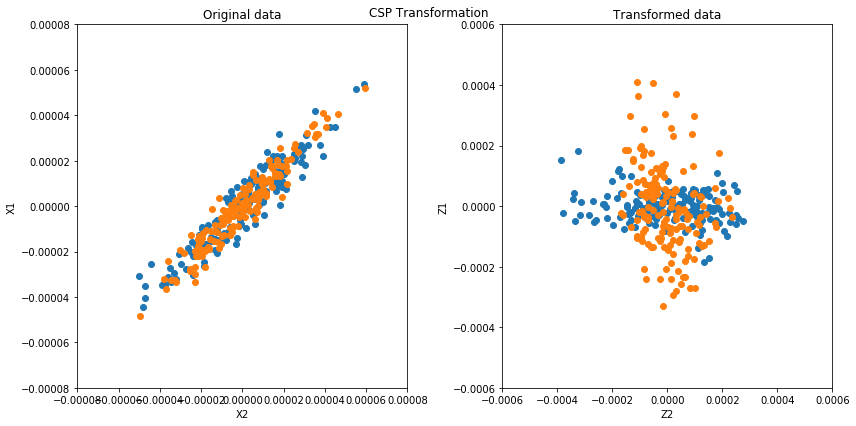

In [118]:
n_components = 4
# CSP model
csp = CSP(n_components=n_components, reg=None, log=None, 
          norm_trace=True, transform_into='csp_space')

transform = csp.fit_transform(X, y)

#original data
o_c11 = X[0][1]
o_c12 = X[0][0]

o_c21 = X[-1][1]
o_c22 = X[-1][0]

# transformation
t_c11 = transform[0][1]
t_c12 = transform[0][0]

t_c21 = transform[-1][1]
t_c22 = transform[-1][0]

# figure
plt.figure(figsize=(12, 6))

plt.suptitle('CSP Transformation')

plt.subplot(121)
plt.title('Original data')
plt.scatter(o_c11, o_c12)
plt.scatter(o_c21, o_c22)

plt.ylim(-0.00008,0.00008)
plt.xlim(-0.00008,0.00008)
plt.ylabel('X1')
plt.xlabel('X2')

plt.subplot(122)
plt.title('Transformed data')

plt.scatter(t_c11, t_c12)
plt.scatter(t_c21, t_c22)
plt.ylim(-0.0006,0.0006)
plt.xlim(-0.0006,0.0006)
plt.ylabel('Z1')
plt.xlabel('Z2')
plt.tight_layout()
plt.show()